In [3]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [14]:
perfomances_dt4 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt4.rds")[None] # also works for RData
# Get base level L and create L_pct reduction (% reduction with baselevel)
# baselevel_n = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['L'].to_numpy()[0]
# perfomances_dt5['L_pct_red'] = (1-(perfomances_dt5['L']/baselevel_n))*100
# Get base level P and create P_dlt (change in P with baselevel)
baselevel_p = perfomances_dt4[(perfomances_dt4['NMS'] == '1') & (perfomances_dt4['policy'] == 'fee_0')]['P'].to_numpy()[0]
perfomances_dt4['P_dlt'] = perfomances_dt4['P']-baselevel_p
# CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
baselevel_y = perfomances_dt4[(perfomances_dt4['NMS'] == '1') & (perfomances_dt4['policy'] == 'fee_0')]['Y_corn'].to_numpy()[0]
perfomances_dt4['Y_corn_pct'] = perfomances_dt4['Y_corn']/baselevel_y

# #Keep change in Y >= 95%
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] >= 0.95]
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] <= 1.05]

# #Calculate ag-sector cost
perfomances_dt4['C'] = - perfomances_dt4['P_dlt'] - perfomances_dt4['G']
perfomances_dt4[perfomances_dt4['policy_name'] == 'fee']


,policy,NMS,Y_corn,L1,L2,L,N_fert,P,G,corn_avg_ha,L_change,Y_corn_change,S,GC,policy_val,policy_name,P_dlt,Y_corn_pct,C
35,fee_0,1,11104.888428,34.676863,22.871308,57.548171,189.023127,1422.368191,0.000000,7.144542e+07,0.0,1.000000,0.000000,0.00,0.0,fee,0.000000,1.000000,-0.000000
36,fee_1,1,11083.626465,33.399055,22.235605,55.634660,181.846425,1368.780548,55.634660,7.144542e+07,-3.3,0.998085,-53.587643,2.05,1.0,fee,-53.587643,0.998085,-2.047017
37,fee_2,1,11060.654397,32.324665,21.707123,54.031788,175.646596,1317.475422,108.063577,7.144542e+07,-6.1,0.996017,-104.892769,3.17,2.0,fee,-104.892769,0.996017,-3.170808
38,fee_3,1,11027.835074,31.207265,21.164259,52.371524,169.023127,1268.466149,157.114572,7.144542e+07,-9.0,0.993061,-153.902041,3.21,3.0,fee,-153.902041,0.993061,-3.212530
39,fee_4,1,11013.980560,30.723125,20.917863,51.640988,165.646596,1219.440708,206.563953,7.144542e+07,-10.3,0.991814,-202.927483,3.64,4.0,fee,-202.927483,0.991814,-3.636471
40,fee_5,1,10991.663682,30.169197,20.640610,50.809808,161.846425,1171.491379,254.049039,7.144542e+07,-11.7,0.989804,-250.876811,3.17,5.0,fee,-250.876811,0.989804,-3.172227
41,fee_6,1,10968.963788,29.727710,20.430042,50.157752,159.023127,1123.392232,300.946509,7.144542e+07,-12.8,0.987760,-298.975959,1.97,6.0,fee,-298.975959,0.987760,-1.970550
42,fee_7,1,10968.963788,29.727710,20.430042,50.157752,159.023127,1073.234480,351.104261,7.144542e+07,-12.8,0.987760,-349.133710,1.97,7.0,fee,-349.133710,0.987760,-1.970550
43,fee_8,1,10920.472410,28.799877,19.959462,48.759339,151.846425,1032.498928,390.074712,7.144542e+07,-15.3,0.983393,-389.869263,0.21,8.0,fee,-389.869263,0.983393,-0.205449
44,fee_9,1,10920.472410,28.799877,19.959462,48.759339,151.846425,983.739589,438.834051,7.144542e+07,-15.3,0.983393,-438.628602,0.21,9.0,fee,-438.628602,0.983393,-0.205449


In [20]:
perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
# perfomances_dt4 = perfomances_dt4[perfomances_dt4['L_change'] >= 0]
perfomances_dt4 = perfomances_dt4.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == '1')]
fee_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == '1')]
nred_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == '1')]
# subs_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'subs') & (perfomances_dt4['NMS'] == '1')]
shadow_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == '1')]

ratio_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == '2')]
fee_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == '2')]
nred_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == '2')]
# subs_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'subs') & (perfomances_dt4['NMS'] == '2')]
shadow_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == '2')]

perfomances_dt4[perfomances_dt4['policy_name'] == 'fee']
shadow_2_dt

,policy,NMS,Y_corn,L1,L2,L,N_fert,P,G,corn_avg_ha,L_change,Y_corn_change,S,GC,policy_val,policy_name,P_dlt,Y_corn_pct,C
65,shadow_0.73,2,10595.590027,25.825831,18.407201,44.233032,124.543298,1396.202295,0.0,7.144542e+07,23.1,0.954137,-26.165896,-26.17,0.73,shadow,-26.165896,0.954137,26.165896
66,shadow_0.76,2,10702.554193,26.461977,18.712797,45.174774,131.306457,1406.443067,0.0,7.144542e+07,21.5,0.963770,-15.925123,-15.93,0.76,shadow,-15.925123,0.963770,15.925123
67,shadow_0.79,2,10797.652661,27.153451,19.060179,46.213630,138.171860,1414.951070,0.0,7.144542e+07,19.7,0.972333,-7.417121,-7.42,0.79,shadow,-7.417121,0.972333,7.417121
68,shadow_0.8,2,10815.099078,27.294772,19.138068,46.432839,139.442545,1416.504090,0.0,7.144542e+07,19.3,0.973904,-5.864101,-5.86,0.80,shadow,-5.864101,0.973904,5.864101
69,shadow_0.82,2,10864.613465,27.869416,19.414969,47.284385,144.322851,1420.019889,0.0,7.144542e+07,17.8,0.978363,-2.348302,-2.35,0.82,shadow,-2.348302,0.978363,2.348302
70,shadow_0.85,2,10921.799913,28.674795,19.782274,48.457069,150.563519,1423.657525,0.0,7.144542e+07,15.8,0.983513,1.289334,1.29,0.85,shadow,1.289334,0.983513,-1.289334
71,shadow_0.88,2,10962.323995,29.462962,20.159893,49.622855,156.194646,1425.389107,0.0,7.144542e+07,13.8,0.987162,3.020916,3.02,0.88,shadow,3.020916,0.987162,-3.020916
72,shadow_0.9,2,10986.482910,29.937160,20.386599,50.323759,159.420588,1426.513196,0.0,7.144542e+07,12.6,0.989338,4.145005,4.15,0.90,shadow,4.145005,0.989338,-4.145005
73,shadow_0.91,2,10996.540199,30.164332,20.507141,50.671473,160.999152,1426.816221,0.0,7.144542e+07,11.9,0.990243,4.448031,4.45,0.91,shadow,4.448031,0.990243,-4.448031
74,shadow_0.92,2,11008.634603,30.439436,20.640648,51.080084,162.835111,1427.224267,0.0,7.144542e+07,11.2,0.991332,4.856076,4.86,0.92,shadow,4.856076,0.991332,-4.856076


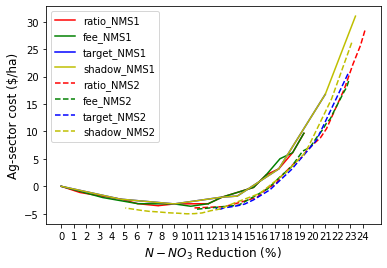

In [24]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
ax.plot(shadow_1_dt['L_change'], shadow_1_dt['C'], color = 'y', label = 'shadow_NMS1')
ax.plot(ratio_2_dt['L_change'], ratio_2_dt['C'], linestyle='dashed', color = 'r',  label = 'ratio_NMS2')
ax.plot(fee_2_dt['L_change'], fee_2_dt['C'], linestyle='dashed', color = 'g', label = 'fee_NMS2')
ax.plot(nred_2_dt['L_change'], nred_2_dt['C'], linestyle='dashed', color = 'b', label = 'target_NMS2')
ax.plot(shadow_2_dt['L_change'], shadow_2_dt['C'], linestyle='dashed', color = 'y', label = 'shadow_NMS2')

plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Ag-sector cost ($/ha)", size = 12)
ax.set_xticks((np.arange(0, 25, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/ag_sector_cost.png"
plt.savefig(plot_file_name, dpi=300)